In [1]:
import tensorflow as tf
import numpy as np

from mrl import *
from A3Ccustom import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## train

In [58]:
agent = MRLAgent(gamma=0.75,stsize=30,seed=2)
train_data = agent.train_curr(3000,eps=1)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


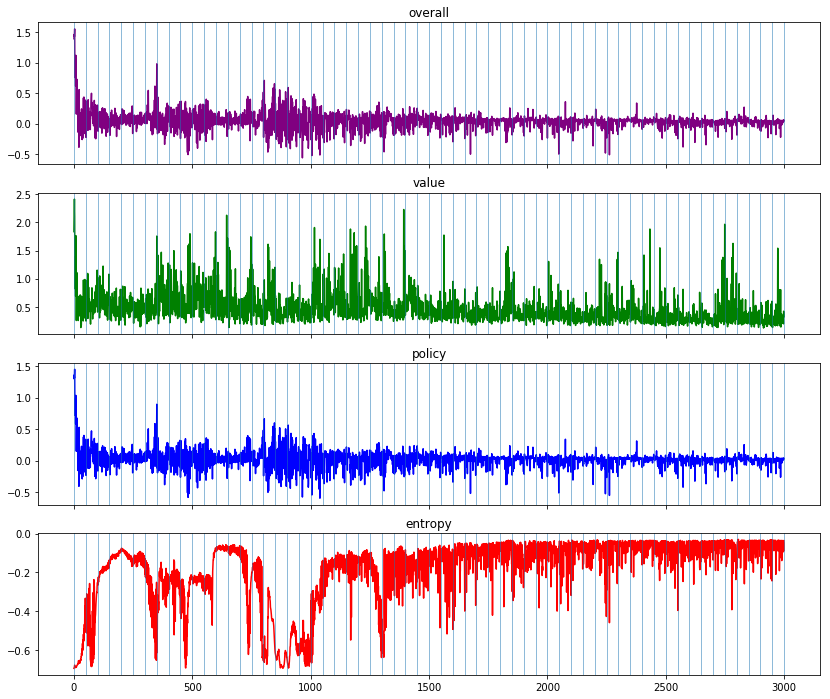

In [62]:
fig,axarr = plt.subplots(4,1,figsize=(14,12),sharex=True)

cL = ['purple','g','b','r']
titleL = ['overall','value','policy','entropy']
for i in range(4):
  axarr[i].plot(train_data[:,i],c=cL[i])
  axarr[i].set_title(titleL[i])
  for t in np.arange(0,3001,50):
    axarr[i].axvline(t,lw=.5)
#   axarr[i].axhline(0,lw=.5,color='black')

In [60]:
eps = 500
eval_r1 = agent.eval(eps,eval_bandit=np.array([0.2,0.8]))
eval_r2 = agent.eval(eps,eval_bandit=np.array([0.8,0.2]))

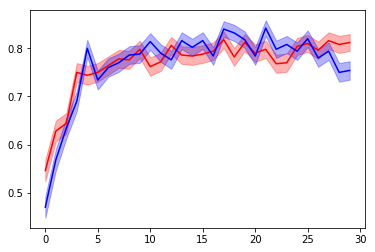

In [61]:
cL = ['r','b']
for idx,eval_r in enumerate([eval_r1,eval_r2]):
  M = eval_r.mean(0)
  S = eval_r.std(0)/np.sqrt(eps)
  plt.plot(M,c=cL[idx])
  plt.fill_between(np.arange(30),M-S,M+S,alpha=.3,color=cL[idx])

In [101]:
agent = MRLAgent(gamma=0.3,stsize=20)
agent.graph.get_all_collection_keys()

['variables', 'trainable_variables', 'while_context', 'train_op']

In [98]:
agent.graph.get_collection('variables')
agent.graph.

[<tf.Variable 'initial_state:0' shape=(1, 20) dtype=float32_ref>,
 <tf.Variable 'rnn/kernel:0' shape=(4, 80) dtype=float32>,
 <tf.Variable 'rnn/recurrent_kernel:0' shape=(20, 80) dtype=float32>,
 <tf.Variable 'rnn/bias:0' shape=(80,) dtype=float32>,
 <tf.Variable 'dense/kernel:0' shape=(20, 1) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(20, 2) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32>,
 <tf.Variable 'beta2_power:0' shape=() dtype=float32>,
 <tf.Variable 'rnn/kernel/Adam:0' shape=(4, 80) dtype=float32>,
 <tf.Variable 'rnn/kernel/Adam_1:0' shape=(4, 80) dtype=float32>,
 <tf.Variable 'rnn/recurrent_kernel/Adam:0' shape=(20, 80) dtype=float32>,
 <tf.Variable 'rnn/recurrent_kernel/Adam_1:0' shape=(20, 80) dtype=float32>,
 <tf.Variable 'rnn/bias/Adam:0' shape=(80,) dtype=float32>,
 <tf.Variable 'rnn/bias/Adam_1:0' shape=(80,) dtype=float32>

### eval plot

### regret plot

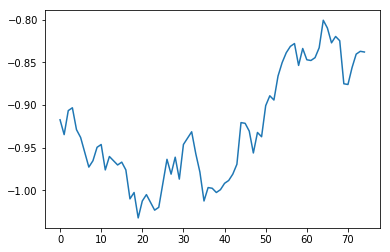

In [24]:
# is the agent just exploting one arm which is slightly more likely under the current random seed?
R=[]
for i in range(500):
  eval_reward = agent.eval(1)
  bandit = np.round(agent.env.banditpr[0],1)
  if bandit==0.1:
    c='r'
  elif bandit==0.9:
    c='b'
    continue
  regret=.9*np.arange(75)-np.cumsum(eval_reward)
  R.append(regret)
#   plt.plot(regret,color=c)
  
plt.plot(np.mean(R,0))

# debug

In [106]:
task = BanditsSim1()
task.new_episode(eplen=10,p0=0.1)

In [175]:
task.new_episode(eplen=10,p0=0.3)
terminate = False
s,r,terminate = task.pullArm(1)
while terminate==False:
  s,r,terminate = task.pullArm(0)
  print(task.pr_rewards)
  
  

[0.51, 0.19999999999999996]
[0.30000000000000004, 0.3599999999999999]
[0.30000000000000004, 0.4879999999999999]
[0.30000000000000004, 0.5903999999999999]
[0.30000000000000004, 0.6723199999999999]
[0.30000000000000004, 0.7378559999999998]
[0.30000000000000004, 0.7902847999999999]
[0.30000000000000004, 0.8322278399999999]
[0.30000000000000004, 0.8657822719999999]


In [176]:
agent = MRLAgent()

In [199]:
eb = agent.unroll_episode()
agent.update(eb)
len(eb)

71

In [203]:
tf.train.AdamOptimizer(0.05) or tf.train.RMSPropOptimizer(0.00005)